### Q1: What is the distribution of review sentiments across different genres? Do some genres receive more positive or negative ratings than others?

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#display entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#hide warnings from jupyter notebook
import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option("display.max.columns", None)

#visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
from IPython.display import set_matplotlib_close
set_matplotlib_close(True)
import seaborn as sns

# statistics
import scipy

In [2]:
# read goodreads csv file into a dataframe. This csv file was created once duplicates were removed
#Please change the path based on where files are located
path = '../data/'

goodreads = pd.read_csv(path + 'goodreads_cleaned.csv')

In [3]:
goodreads.head()

,book_id,title,isbn,isbn13,title_without_series,review_text,review_id,rating,user_id,authors,average_rating,country_code,edition_information,n_comments,n_votes,language_code,num_pages,publication_day,publication_month,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,work_id,genre,review_pos_score,review_neg_score,review_neu_score,review_compound_score,review_sentiment,review_length,review_language
0,11346143,Strange Case Of Origami Yoda,0810996502,9780810996502,Strange Case Of Origami Yoda,Quirky and silly will save it for my son when ...,a95478e83fb0549916181dec2e6c02de,3,ae6c9ceec7a41254191ffdb8852bd031,"[Row(author_id='3172535', role='')]",3.90,US,NaN,0,0,eng,154.0,NaN,NaN,NaN,NaN,143,['257006'],"['7172060', '6330886', '9564947', '7739868', '...",29,7415356,children,0.249,0.000,0.751,0.5106,Positive,15,en
1,12354883,Shadow the Sheep-dog,NaN,NaN,Shadow the Sheep-dog,I read this as a kid and enjoyed it and now ha...,d348df0f30853c95f16bf5f292e42bb9,3,1fee0f40606726eb46e30612e6dd8485,"[Row(author_id='10657', role=''), Row(author_i...",4.32,US,NaN,0,0,eng,188.0,NaN,NaN,1948.0,Angus and Robertson,10,[],"['794739', '2740021', '885350', '31964', '2220...",2,1433595,children,0.086,0.119,0.795,-0.8181,Negative,141,en
2,12734774,Mikolay and Julia Meet the Fairies (Mikolay an...,NaN,NaN,Mikolay and Julia Meet the Fairies (Mikolay an...,What a delightful children's story. I can't wa...,3c550b2365eb869d57d81236f4cfbf27,5,7f778517ad88c4feed6183c54b6403e5,"[Row(author_id='5236455', role='')]",4.65,US,NaN,0,1,eng,38.0,NaN,9.0,2010.0,Mayan Books,24,['305783'],[],10,17872488,children,0.201,0.019,0.780,0.9879,Positive,152,en
3,130196,The Trumpet of the Swan,0590406191,9780590406192,The Trumpet of the Swan,"Even as an adult, I enjoy some children's lite...",87379d304d5d38d555e9a04b8eafe74a,3,1fa3b5759854065c9d1e1048f38d2507,"[Row(author_id='988142', role=''), Row(author_...",4.06,US,NaN,0,0,eng,210.0,NaN,NaN,1970.0,NaN,280,[],"['89546', '24384', '827430', '240815', '426206...",43,1835542,children,0.217,0.000,0.783,0.9356,Positive,74,en
4,13790759,Sarah Gives Thanks: How Thanksgiving Became a ...,080757239X,9780807572399,Sarah Gives Thanks: How Thanksgiving Became a ...,More like a 3.5'er,d2acf777a2748ec4a481de94e17a1666,3,4b3548b067eaea2a7eb23eb45da9d375,"[Row(author_id='5861865', role=''), Row(author...",4.08,US,NaN,0,0,eng,32.0,1.0,9.0,2012.0,Albert Whitman Company,184,[],"['13330625', '9885866', '13414838', '12763989'...",49,19424630,children,0.482,0.000,0.518,0.4201,Positive,4,en


## Sentiment Analysis

(array([0.26225632, 0.13586456, 0.13577685, 0.13253154, 0.09955215,
        0.41610167, 0.21269953, 0.48960361, 0.71537209, 2.40074173]),
 array([-0.9999 , -0.79992, -0.59994, -0.39996, -0.19998,  0.     ,
         0.19998,  0.39996,  0.59994,  0.79992,  0.9999 ]),
 <a list of 10 Patch objects>)

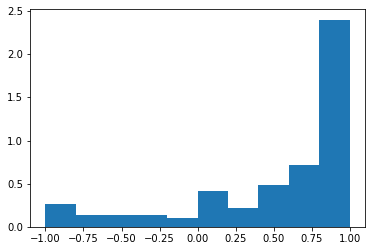

In [4]:
plt.hist(data=goodreads, x="review_compound_score", density=True)

In [5]:
#Number of books in our dataset
len(goodreads)

57011

In [6]:
#Count of books in History/Biography genre
len(goodreads[goodreads['genre']=='history'])

17827

In [7]:
#Count of books in Children genre
len(goodreads[goodreads['genre']=='children'])

19527

In [8]:
#Count of books in Mystery/Thriller genre
len(goodreads[goodreads['genre']=='mystery'])

19657

In [9]:
#Looking at the count of review sentiments
goodreads['review_sentiment'].value_counts()

Positive    44644
Negative     8507
Neutral      3860
Name: review_sentiment, dtype: int64

In [10]:
#Looking at the count of ratings
goodreads['rating'].value_counts()

4    19663
5    19640
3    11040
2     3402
0     2196
1     1070
Name: rating, dtype: int64

Text(0.5, 0.98, 'Distribution of Review Sentiments in Different Genres')

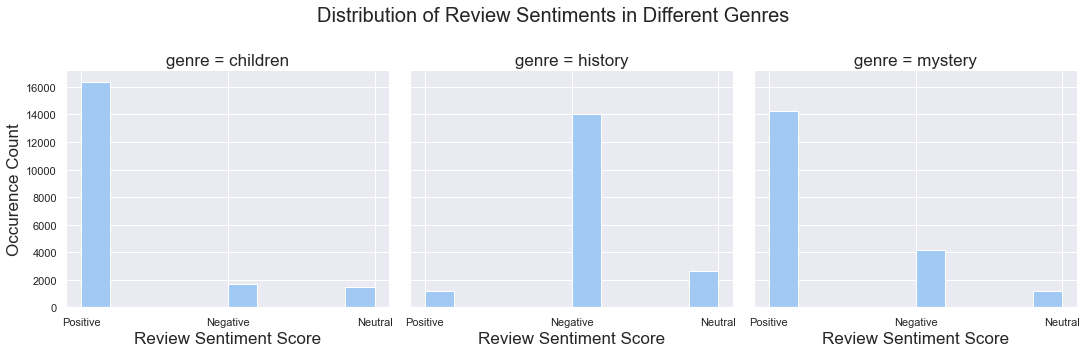

In [11]:
# explore the distribution of reviews across each genre
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("notebook", rc={"axes.labelsize":17})
sns.set_palette("pastel")
g = sns.FacetGrid(goodreads, col="genre", height = 5)
g.map(plt.hist, "review_sentiment")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Review Sentiments in Different Genres', fontsize = 20)
g.set_axis_labels("Review Sentiment Score", "Occurence Count")

Note: For some reason the chart above is returning the top value in history genre sentiment as Negative, which is actually inacurate. Such issue doesn't exist if I transfrom the chart via the following two ways.

Text(0.5, 0.98, 'Distribution of Review Sentiment Scores in Different Genres')

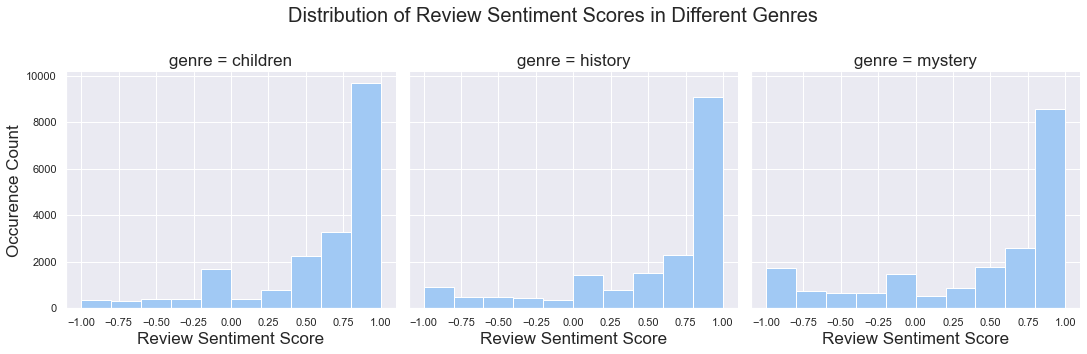

In [12]:
# explore the distribution of review scores across each genre
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("notebook", rc={"axes.labelsize":17})
sns.set_palette("pastel")
g = sns.FacetGrid(goodreads, col="genre", height = 5)
g.map(plt.hist, "review_compound_score")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Review Sentiment Scores in Different Genres', fontsize = 20)
g.set_axis_labels("Review Sentiment Score", "Occurence Count")

Text(0.5, 0.98, 'Distribution of Review Sentiments in Different Genres')

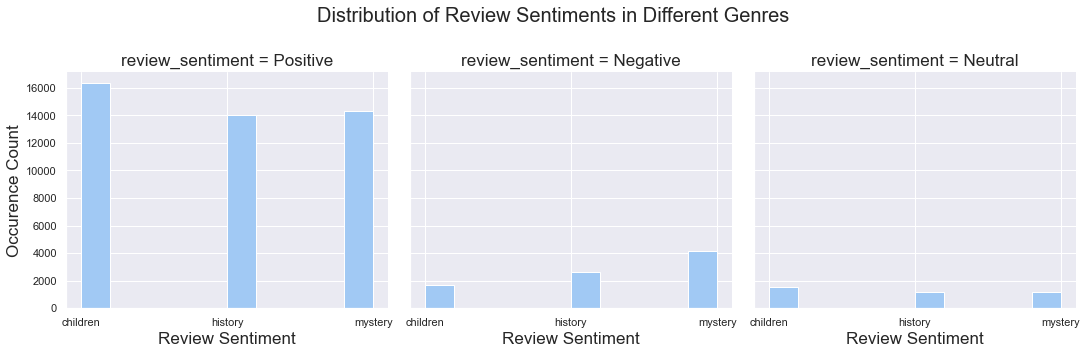

In [13]:
# explore the distribution of reviews across each genre
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("notebook", rc={"axes.labelsize":17})
sns.set_palette("pastel")
g = sns.FacetGrid(goodreads, col="review_sentiment", height = 5)
g.map(plt.hist, "genre")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Review Sentiments in Different Genres', fontsize = 20)
g.set_axis_labels("Review Sentiment", "Occurence Count")

In [14]:
#g.savefig('review_sentiment_across_genres.svg', format='svg', dpi=1200)

### Interpretation:

Based on the histograms above:
- Children and Mystery/Thriller genres received mostly postive reviews;
- History/Biography genre received mostly negative reviews

### Q2: Is the sentimental tone for review matching the rating scores that users give? Does the behavior discrepancy exist between how users rate and how they write reviews? If so, is the discrepancy more salient in one genre vs the others?

Steps:
1. Generating pivo table to examine the distribution of review sentiments within each rating score category (0-5).
2. Using stacked column chart to display the relationship between ratings and review sentiment

In [15]:
#Generating pivo table with user rating scores and user review sentiments
#ptc stands for Pivot Table Count
goodreads['ptc'] = 1

table = pd.pivot_table(goodreads, values='ptc', index=['rating'],
                    columns=['review_sentiment'], aggfunc=np.sum, fill_value=0)

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7f8850e3ed00>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5')])

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Sentiment Occruence Count')

Text(0.5, 1.0, 'Review Sentiments Breakdown For Each Rating Score\n')

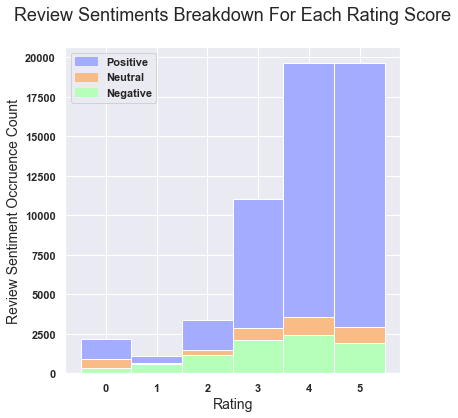

In [16]:
#Creating stacked column chart

# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
neg = table['Negative'].tolist()
neu = table['Neutral'].tolist()
pos = table['Positive'].tolist()
 
# Heights of negative + neutral counts
bars = np.add(neg, neu).tolist()
 
# The position of the bars on the x-axis across rating scores
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = ['0','1','2','3','4','5']
barWidth = 1
 
# Create green bars for negative reviews
plt.bar(r, neg, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange bars (middle) for neutral reviews, on top of the negative ones
plt.bar(r, neu, bottom=neg, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue bars (top) for positive reviews
plt.bar(r, pos, bottom=bars, color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Rating", fontsize = 14)
plt.ylabel("Review Sentiment Occruence Count", fontsize=14)
plt.title('Review Sentiments Breakdown For Each Rating Score\n', fontsize = 18)

#setting legends
pos_patch = mpatches.Patch(color='#a3acff', label='Positive')
neu_patch = mpatches.Patch(color='#f9bc86', label='Neutral')
neg_patch = mpatches.Patch(color='#b5ffb9', label='Negative')
plt.legend(handles=[pos_patch,neu_patch,neg_patch])

# Show graphic
plt.show()

### Interpretation
The behavior discrepancy does exist between rating and review behaviors:
- Most users who rate a book highly (4 and 5 stars) would also leave a positve review. Books with high rating scores are not immune to negative reviews.
- The majority of users who gave books 3 stars still left with positive reviews
- A good portion of 1 stars and 2 stars came along with positive reviews as well
- Some users wrote a review but didn't rate a book. Among those reviews without ratings, positive reviews is still the majority.

In [17]:
#looking at the rating & review sentiment mix in each genre
history = goodreads[goodreads['genre'] == 'history']
children = goodreads[goodreads['genre'] == 'children']
mystery = goodreads[goodreads['genre'] == 'mystery']

In [18]:
#history['review_sentiment'].value_counts()

Text(0.5, 0.98, 'Sentiments Within Each Rating Score in Different Genres')

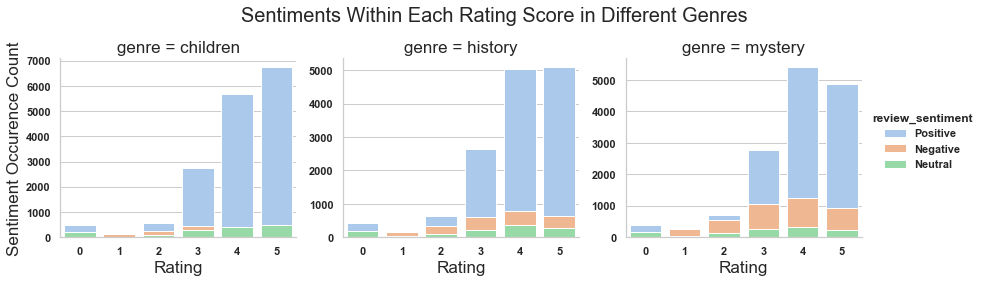

In [19]:
#exploring the review sentiments within each rating score for each genre
sns.set_style("whitegrid")
sns.set_palette("pastel")
g = sns.FacetGrid(goodreads, hue="review_sentiment", col="genre", height=4, sharey=False)
g.map(sns.countplot, "rating")
g.add_legend()

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Sentiments Within Each Rating Score in Different Genres', fontsize = 20)
g.set_axis_labels("Rating", "Sentiment Occurence Count")

Text(0.5, 0.98, 'Sentiments Within Each Rating Score in Different Genres')

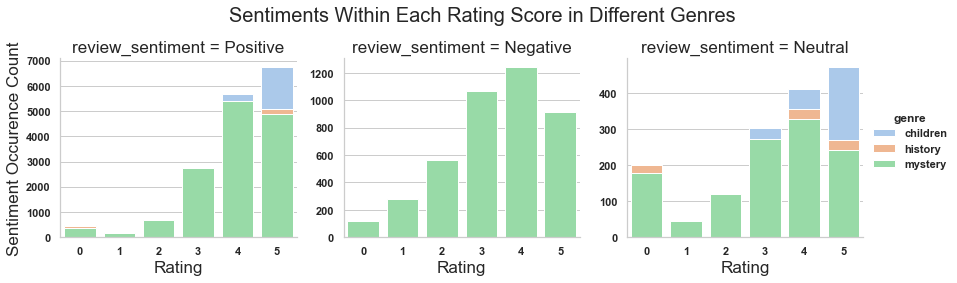

In [20]:
#exploring the review sentiments within each rating score for each genre
sns.set_style("whitegrid")
sns.set_palette("pastel")
g = sns.FacetGrid(goodreads, hue="genre", col="review_sentiment", height=4, sharey=False)
g.map(sns.countplot, "rating")
g.add_legend()

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Sentiments Within Each Rating Score in Different Genres', fontsize = 20)
g.set_axis_labels("Rating", "Sentiment Occurence Count")

# Users Analysis

In [21]:
users = pd.DataFrame(goodreads['user_id'].value_counts())

In [22]:
users.reset_index(inplace=True)

In [23]:
users.rename(columns={'index':'user_id','user_id': 'reviews_count'},inplace=True)

In [24]:
users.head()

,user_id,reviews_count
0,a2d6dd1685e5aa0a72c9410f8f55e056,158
1,9003d274774f4c47e62f77600b08ac1d,100
2,97e2ce2141fa1c880967d78aec3c14fa,75
3,e5905d648022af7b1309d82a1f4d255b,61
4,6cbfee0ca526f0b53e89b9d641c07d0e,55


In [25]:
len(users)

31472

In [26]:
goodreads[['user_id','rating','review_compound_score','review_length']].groupby(['user_id']).mean()

,rating,review_compound_score,review_length
user_id,,,
0005a08accd53b1e19c52109a1f478cb,5.0,0.34000,54.0
0005f52944ea1992e95d61f287acaea9,4.0,0.99735,318.0
0006a5b8cda1ba6d7b911dc575f6547b,2.0,-0.78870,118.0
0006db397ebf02b2e891d1048fb70dbc,0.0,0.00000,8.0
000954cd3ca52a70fec60c24f6531fe7,3.0,0.93160,40.0
...,...,...,...
fffcf1fb175cb17786e1c2f83ffe8b8f,5.0,0.83130,9.0
fffd156b0ffcad33247f9f9cc990c7e2,5.0,0.99360,82.0
fffd212be97b2a2caef804e0427ccc22,2.0,-0.96160,101.0


In [27]:
users = pd.pivot_table(goodreads, values=['ptc','rating','review_compound_score','review_length'],
               index=['user_id'],
               aggfunc={'ptc': np.sum,
                        'rating': [min,max,np.mean],
                        'review_compound_score':[min, max, np.mean],
                        'review_length':np.mean})

In [28]:
users.columns = ['_'.join(col).strip() for col in users.columns.values]

In [29]:
users.head()

,ptc_sum,rating_max,rating_mean,rating_min,review_compound_score_max,review_compound_score_mean,review_compound_score_min,review_length_mean
user_id,,,,,,,,
0005a08accd53b1e19c52109a1f478cb,1,5.0,5.0,5.0,0.3400,0.34000,0.3400,54.0
0005f52944ea1992e95d61f287acaea9,2,4.0,4.0,4.0,0.9994,0.99735,0.9953,318.0
0006a5b8cda1ba6d7b911dc575f6547b,1,2.0,2.0,2.0,-0.7887,-0.78870,-0.7887,118.0
0006db397ebf02b2e891d1048fb70dbc,1,0.0,0.0,0.0,0.0000,0.00000,0.0000,8.0
000954cd3ca52a70fec60c24f6531fe7,1,3.0,3.0,3.0,0.9316,0.93160,0.9316,40.0


In [30]:
#goodreads[goodreads["rating"] == 0][['review_sentiment','review_text']].sample(10)

In [31]:
users.reset_index(inplace=True)

In [32]:
users.rename(columns={'ptc_sum':'reviews_count','review_compound_score_max': 'sentiment_highest',
                      'review_compound_score_min': 'sentiment_lowest',
                      'review_compound_score_mean': 'average_sentiment'},inplace=True)

In [33]:
users.set_index('user_id',inplace=True)

In [34]:
users.head()

,reviews_count,rating_max,rating_mean,rating_min,sentiment_highest,average_sentiment,sentiment_lowest,review_length_mean
user_id,,,,,,,,
0005a08accd53b1e19c52109a1f478cb,1,5.0,5.0,5.0,0.3400,0.34000,0.3400,54.0
0005f52944ea1992e95d61f287acaea9,2,4.0,4.0,4.0,0.9994,0.99735,0.9953,318.0
0006a5b8cda1ba6d7b911dc575f6547b,1,2.0,2.0,2.0,-0.7887,-0.78870,-0.7887,118.0
0006db397ebf02b2e891d1048fb70dbc,1,0.0,0.0,0.0,0.0000,0.00000,0.0000,8.0
000954cd3ca52a70fec60c24f6531fe7,1,3.0,3.0,3.0,0.9316,0.93160,0.9316,40.0


Text(0.5, 1.0, 'Relationship Between Number of Reviews and Review Length Among Useers\n')

Text(0.5, 0, 'Average Length of Reviews By Users')

Text(0, 0.5, 'Number of Reviews Written By Users')

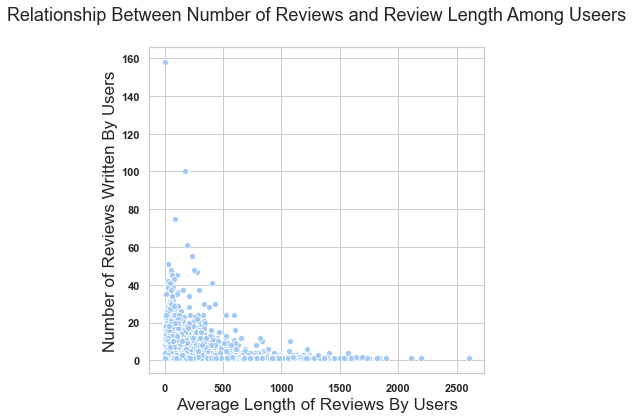

In [35]:
#distribution of review counts per user
a=sns.scatterplot(data=users,x="review_length_mean",y="reviews_count")
a.set_title('Relationship Between Number of Reviews and Review Length Among Useers\n',fontsize=18)
a.set_xlabel("Average Length of Reviews By Users")
a.set_ylabel("Number of Reviews Written By Users")
#a.annotate(scipy.stats.pearsonr)

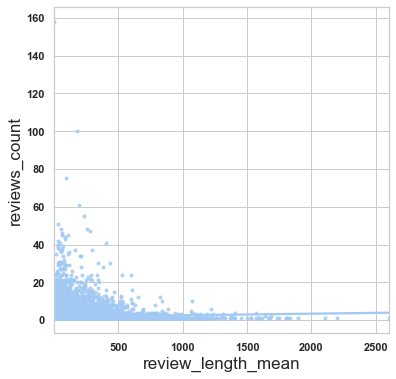

In [36]:
sns.regplot(data=users,x="review_length_mean",y="reviews_count", marker=".")

In [78]:
#top 2 users who posted most reviews
users['reviews_count'].nlargest(n=2, keep='all')

user_id
a2d6dd1685e5aa0a72c9410f8f55e056    158
9003d274774f4c47e62f77600b08ac1d    100
Name: reviews_count, dtype: int64

In [47]:
users['reviews_count'].describe()

count    31472.000000
mean         1.811483
std          2.678916
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        158.000000
Name: reviews_count, dtype: float64

In [89]:
#user who wrote the most reviews
users[users.index=='a2d6dd1685e5aa0a72c9410f8f55e056']

,reviews_count,rating_max,rating_mean,rating_min,sentiment_highest,average_sentiment,sentiment_lowest,review_length_mean
user_id,,,,,,,,
a2d6dd1685e5aa0a72c9410f8f55e056,158,0.0,0.0,0.0,0.0,0.0,0.0,1.113924


In [67]:
#user who wrote the most reviews
goodreads[['review_text','review_sentiment','review_language','genre']].loc[goodreads['user_id']=='a2d6dd1685e5aa0a72c9410f8f55e056']

,review_text,review_sentiment,review_language,genre
526,SM,Neutral,de,children
563,SM,Neutral,de,children
576,SM,Neutral,de,children
608,E,Neutral,es,children
1181,O,Neutral,pt,children
...,...,...,...,...
55739,SM,Neutral,de,mystery
55768,A,Neutral,tl,mystery
56195,O,Neutral,pt,mystery
56335,SM,Neutral,de,mystery


In [68]:
#user who wrote the most reviews
goodreads['genre'].loc[goodreads['user_id']=='a2d6dd1685e5aa0a72c9410f8f55e056'].value_counts()

children    73
mystery     56
history     29
Name: genre, dtype: int64

In [69]:
#user who wrote the most reviews
goodreads['review_text'].loc[goodreads['user_id']=='a2d6dd1685e5aa0a72c9410f8f55e056'].value_counts()

SM                   60
E                    37
A                    26
O                    23
A \n O                2
A \n SM               2
A \n E \n O \n SM     1
A \n E \n SM          1
O, SM                 1
A \n O \n SM          1
O \n SM               1
A \n SM \n O          1
Large Print           1
E \n O \n SM          1
Name: review_text, dtype: int64

In [81]:
users[users.index=='9003d274774f4c47e62f77600b08ac1d']

,reviews_count,rating_max,rating_mean,rating_min,sentiment_highest,average_sentiment,sentiment_lowest,review_length_mean
user_id,,,,,,,,
9003d274774f4c47e62f77600b08ac1d,100,5.0,3.46,2.0,0.9967,0.809075,-0.9695,176.66


In [86]:
#user who wrote the second most number of reviews
goodreads[['review_text','review_sentiment','review_language','genre']]\
.loc[goodreads['user_id']=='9003d274774f4c47e62f77600b08ac1d']

,review_text,review_sentiment,review_language,genre
556,Seventh grader Hayley Hicks loves making cupca...,Positive,en,children
567,In this second installment of the Eerie Elemen...,Positive,en,children
577,I'm a 3.5 on this one. With pages filled with ...,Negative,en,children
1135,"When Mitzi Tulane wakes up, she is puzzled by ...",Positive,en,children
1145,Striking oil on canvas illustrations complemen...,Positive,en,children
...,...,...,...,...
32723,Dan Eldon grew up in Kenya where he was drawn ...,Positive,en,history
35886,Exquisite watercolor illustrations complement ...,Positive,en,history
42810,"With their party of five reduced by one, the y...",Positive,en,mystery
51612,Eleven-year-old Jimmy Bishop is proud of his C...,Positive,en,mystery


In [82]:
#user who wrote the second most reviews writes mostly reviews for Children books
goodreads['genre'].loc[goodreads['user_id']=='9003d274774f4c47e62f77600b08ac1d'].value_counts()

children    90
history      7
mystery      3
Name: genre, dtype: int64

In [87]:
#user who wrote the second most reviews writes mostly reviews for Children books
goodreads['review_language'].loc[goodreads['user_id']=='9003d274774f4c47e62f77600b08ac1d'].value_counts()

en    100
Name: review_language, dtype: int64

In [49]:
#user who wrote the longest review
users[users['review_length_mean'] == users['review_length_mean'].max()]

,reviews_count,rating_max,rating_mean,rating_min,sentiment_highest,average_sentiment,sentiment_lowest,review_length_mean
user_id,,,,,,,,
e8894beba126e3b4af1c7370baf71621,1,2.0,2.0,2.0,-0.9992,-0.9992,-0.9992,2606.0


In [48]:
users['review_length_mean'].describe()

count    31472.000000
mean       109.128546
std        148.277952
min          1.000000
25%         23.482143
50%         57.000000
75%        135.000000
max       2606.000000
Name: review_length_mean, dtype: float64

In [62]:
#user who wrote the longest review
goodreads[['review_length','title','genre','review_language','review_compound_score','review_sentiment']].loc[goodreads['user_id']=='e8894beba126e3b4af1c7370baf71621']

,review_length,title,genre,review_language,review_compound_score,review_sentiment
55987,2606,"Killing Sarai (In the Company of Killers, #1)",mystery,en,-0.9992,Negative


In [56]:
#Text from the longest review
goodreads[['review_text']].loc[goodreads['user_id']=='e8894beba126e3b4af1c7370baf71621'].to_numpy()

array([['I really wanted to love this book. Really I did! It started off so promising and then went down hill from there. \n UNSPOILERY THOUGHTS \n Things that I liked: \n -The premise was intriguing! I love anti-heroes and Viktor definitely fits the bill \n -Sarai takes matters into her own hands to escape her prison \n Things that I didn\'t like: \n - Viktor starts off as a badass and then starts making rookie mistakes \n - The vacillating! I can\'t take the constant indecisiveness. CONSTANT \n - Recurring danger schtick. The danger is the same and the characters \n never learn. \n - What exactly is The Order? They send mixed vibes. \n - Niklas is so annoying \n - Viktor taking Sarai on a mission when she is a liability \n - Underwhelming sex scene after waiting 70% for one \n - Sarai decides to go vigilante without Viktor & with no training \n SPOILER REVIEW \n This is pretty long guys! \n Full disclosure: I enjoy first person POVs. I enjoy multiple POVs (but don\'t get crazy). I do

In [64]:
goodreads[goodreads['title']=="Killing Sarai (In the Company of Killers, #1)"]

,book_id,title,isbn,isbn13,title_without_series,review_text,review_id,rating,user_id,authors,average_rating,country_code,edition_information,n_comments,n_votes,language_code,num_pages,publication_day,publication_month,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,work_id,genre,review_pos_score,review_neg_score,review_neu_score,review_compound_score,review_sentiment,review_length,review_language,ptc
43410,18400085,"Killing Sarai (In the Company of Killers, #1)",NaN,NaN,"Killing Sarai (In the Company of Killers, #1)",Great book! Really different story not at all ...,92cc84307a67a4bba1c9489edae70e03,5,b0e2ca259b63d4e1775b73283518a792,"[Row(author_id='5437976', role='')]",4.17,US,2nd Edition,0,0,eng,388.0,18.0,6.0,2013.0,J.A. Redmerski,3510,['515416'],"['17615896', '16282581', '17237477', '17561072...",318,25337090,mystery,0.325,0.052,0.623,0.9693,Positive,52,en,1
55987,20559676,"Killing Sarai (In the Company of Killers, #1)",NaN,NaN,"Killing Sarai (In the Company of Killers, #1)",I really wanted to love this book. Really I di...,2603a74d959cd61e1815eb36694d8834,2,e8894beba126e3b4af1c7370baf71621,"[Row(author_id='5437976', role='')]",4.17,US,3rd edition,0,0,eng,268.0,19.0,1.0,2014.0,NaN,11646,['515416'],"['17615896', '16282581', '17237477', '17561072...",901,25337090,mystery,0.099,0.137,0.764,-0.9992,Negative,2606,en,1


In [66]:
goodreads['review_text'].iloc[43410]

'Great book! Really different story not at all what I expected. Loved it. Exciting, fast paced, darkness with a twist. Seriously loved having something so different and really good to read. Immediately bought and read the second book Reviving Izabel - finished before I could update these pages - really great story.'

Text(0.5, 0.98, 'Relationship Between Number of Reviews and Sentiment Among Users')

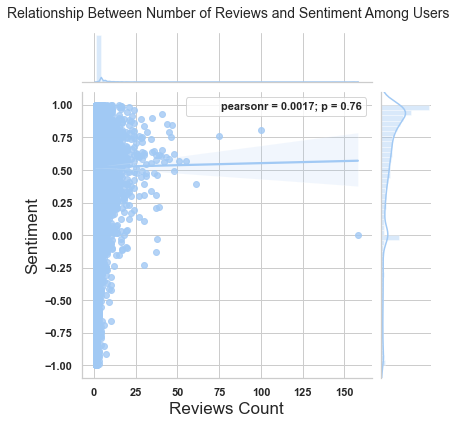

In [40]:
g = sns.jointplot("reviews_count", "average_sentiment", data=users, kind="reg", height=6, ylim=[-1.1,1.1])
g.annotate(scipy.stats.pearsonr)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Relationship Between Number of Reviews and Sentiment Among Users', fontsize=14)
g.set_axis_labels("Reviews Count", "Sentiment")

Text(0.5, 0.98, 'Relationship Between Rating and Reviews Sentiment Among Users')

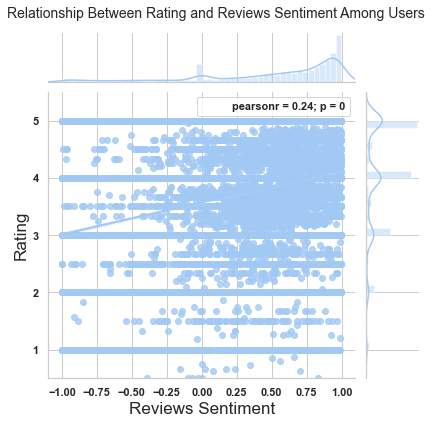

In [41]:
g = sns.jointplot("average_sentiment", "rating_mean", data=users, kind="reg", height=6,
                  xlim = [-1.1,1.1], ylim=[0.5,5.5])
g.annotate(scipy.stats.pearsonr)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Relationship Between Rating and Reviews Sentiment Among Users', fontsize=14)
g.set_axis_labels("Reviews Sentiment", "Rating")

Text(0.5, 0.98, 'Relationship Between Rating and Reviews Sentiment')

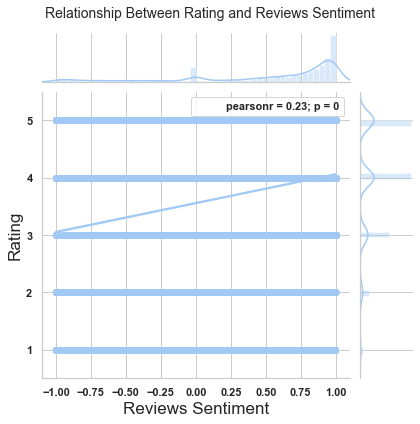

In [42]:
g = sns.jointplot("review_compound_score", "rating", data=goodreads, kind="reg", height=6,
                  xlim = [-1.1,1.1], ylim=[0.5,5.5])
g.annotate(scipy.stats.pearsonr)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Relationship Between Rating and Reviews Sentiment', fontsize=14)
g.set_axis_labels("Reviews Sentiment", "Rating")

Text(0.5, 0.98, "Relationship Between The Books' Rating and Their Reviews' Sentiment")

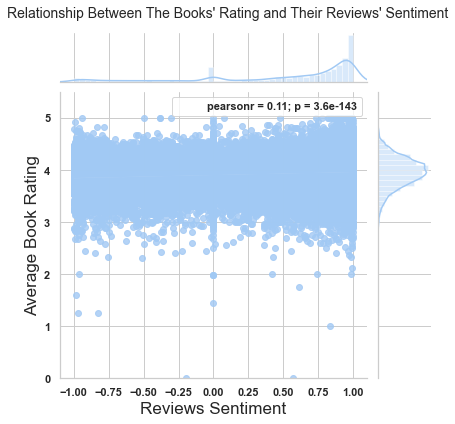

In [43]:
g = sns.jointplot("review_compound_score", "average_rating", data=goodreads, kind="reg", height=6,
                  xlim = [-1.1,1.1], ylim=[0,5.5])
g.annotate(scipy.stats.pearsonr)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Relationship Between The Books' Rating and Their Reviews' Sentiment", fontsize=14)
g.set_axis_labels("Reviews Sentiment", "Average Book Rating")